Keys: <KeysViewHDF5 ['actions', 'rafts']>


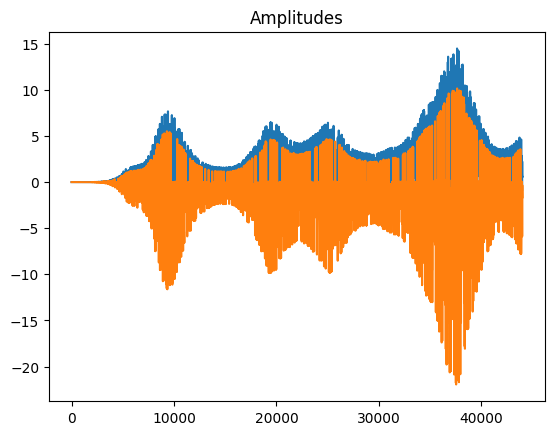

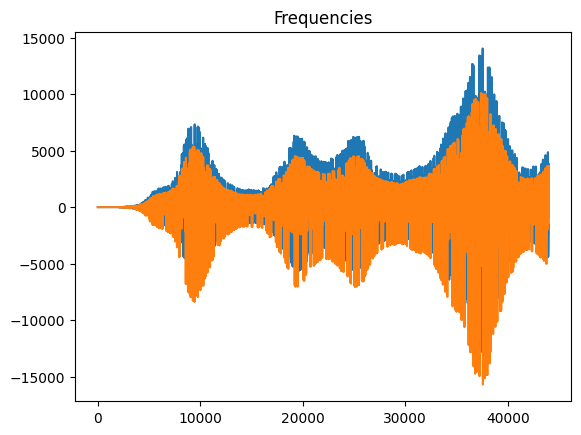

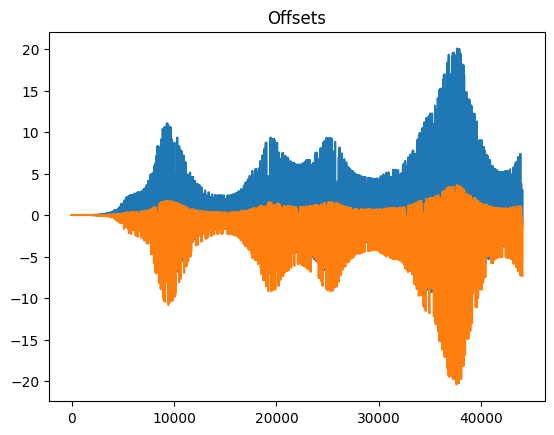

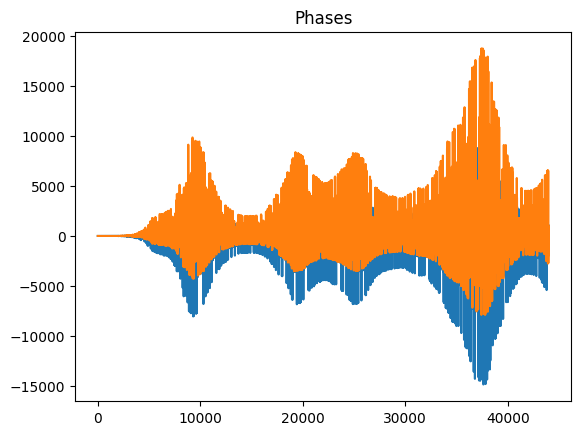

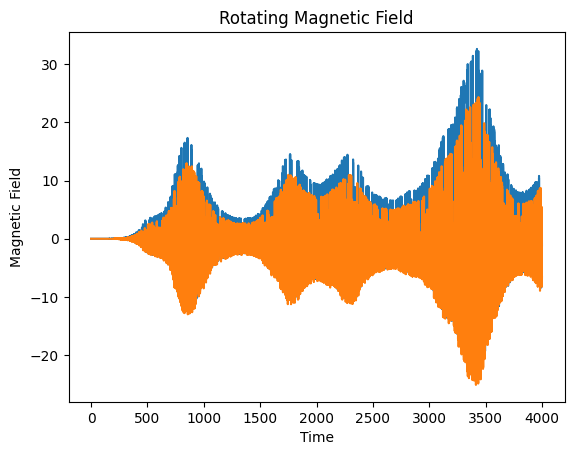

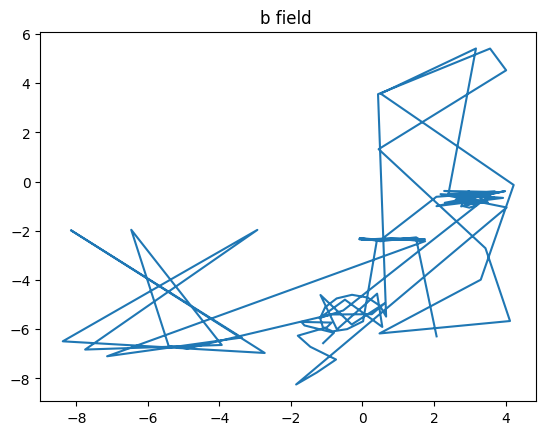

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def calculate_rotating_magnetic_field(amplitude, frequency, offset, phase, time):
    return amplitude * np.sin(2 * np.pi * frequency * time + phase) + offset

# Open the HDF5 file
file_path = 'trajectory.hdf5'
with h5py.File(file_path, 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    time = f["rafts"]["Times"][:].flatten()
    time = np.array([time,time])
    time = np.transpose(time)
    actions = f["actions"]
    action_chunk = {
        "Amplitudes": actions["Amplitudes"][:],
        "Frequencies": actions["Frequencies"][:],
        "Offsets": actions["Offsets"][:],
        "Phases": actions["Phases"][:],
    }
    
    for key, values in action_chunk.items():
        plt.figure()
        plt.plot(values)
        plt.title(key)
        
    plt.figure()
    magnetic_field = calculate_rotating_magnetic_field(
        action_chunk["Amplitudes"],
        action_chunk["Frequencies"],
        action_chunk["Offsets"],
        action_chunk["Phases"],
        time)
        
    plt.plot(time, magnetic_field)
    plt.title('Rotating Magnetic Field')
    plt.xlabel('Time')
    plt.ylabel('Magnetic Field')
    
    plt.figure()
    plt.plot(magnetic_field[-100:,0], magnetic_field[-100:,1])
    plt.title("b field ")
    

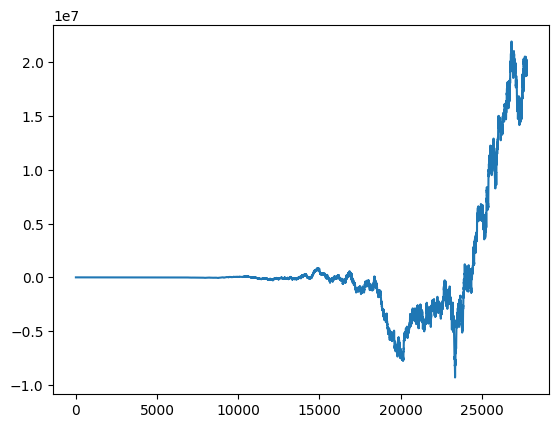

In [5]:
with h5py.File(file_path, 'r') as f:
    direction = np.array(f["rafts"]["Alphas"])
    
    plt.plot(direction.flatten())
    

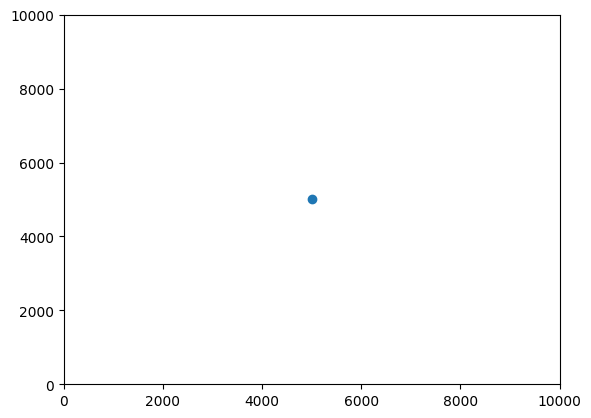

In [77]:
from matplotlib.animation import FuncAnimation

with h5py.File(file_path, 'r') as f:
    pos = f["rafts"]["Unwrapped_Positions"]
    fig, ax = plt.subplots()
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    scat = ax.scatter(pos[0, :, 0], pos[0, :, 1])

    def update(frame):
        scat.set_offsets(pos[frame, :, :])
        return scat,

    ani = FuncAnimation(fig, update, frames=range(len(pos)), blit=True)
    ani.save('trajectory.mp4', writer='ffmpeg', fps=10)
    
    
    
    

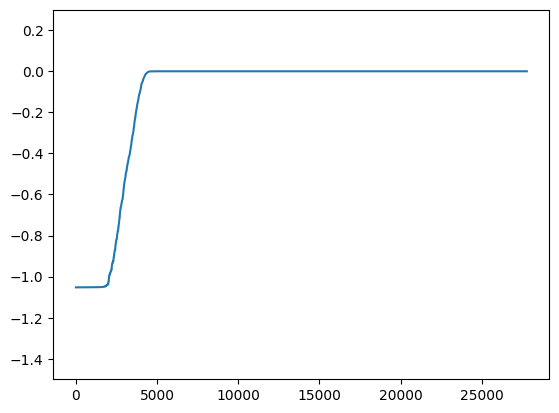

In [6]:
target = np.array([5000, 5000])
with h5py.File(file_path, 'r') as f:
    pos = f["rafts"]["Unwrapped_Positions"]
    fig, ax = plt.subplots()
    reward = -np.linalg.norm(pos - target, axis=2).mean(axis=1)/(0.38*10000)
    ax.plot(reward)
    ax.set_ylim(-1.5, 0.3)